In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline
from keras.layers import Dense, Convolution2D, UpSampling2D, MaxPooling2D, ZeroPadding2D, Flatten, Dropout, Reshape
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Activation
from keras.constraints import maxnorm
from keras.optimizers import SGD , Adam
from keras.layers import Conv2D , BatchNormalization
from keras import backend as K

Using TensorFlow backend.


In [2]:
csv_Path = "D:/DataForPython/FacialEpressions/dataset_faces/fer2013.csv"
x = pd.read_csv(csv_Path)
print (x.values.shape)

(35887, 3)


In [3]:
x.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [4]:
data = x.values
print (data.shape)

(35887, 3)


In [5]:
y = data[:, 0]
pixels = data[:, 1]
print (type(pixels))
print (len(pixels))

<class 'numpy.ndarray'>
35887


In [6]:
X = np.zeros((pixels.shape[0], 48*48))

for ix in range(X.shape[0]):
    p = pixels[ix].split(' ')
    for iy in range(X.shape[1]):
        X[ix, iy] = int(p[iy])

In [7]:
X

array([[ 70.,  80.,  82., ..., 106., 109.,  82.],
       [151., 150., 147., ..., 193., 183., 184.],
       [231., 212., 156., ...,  88., 110., 152.],
       ...,
       [ 17.,  17.,  16., ..., 154., 133., 113.],
       [ 30.,  28.,  28., ...,  35.,  30.,  28.],
       [ 19.,  13.,  14., ..., 189., 199., 201.]])

In [8]:
y

array([0, 0, 2, ..., 0, 3, 2], dtype=object)

In [9]:
x = X

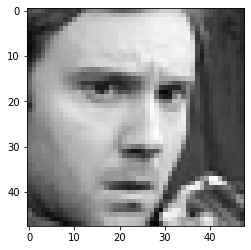

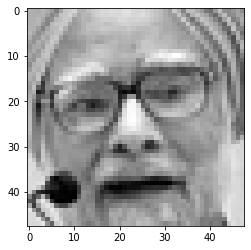

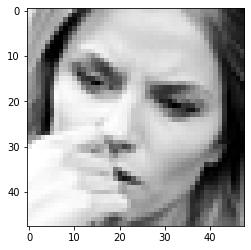

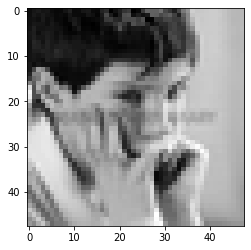

In [10]:
for ix in range(4):
    plt.figure(ix)
    plt.imshow(x[ix].reshape((48, 48)), interpolation='none', cmap='gray')
plt.show()

In [11]:
x = x / 255

In [12]:
x

array([[0.2745098 , 0.31372549, 0.32156863, ..., 0.41568627, 0.42745098,
        0.32156863],
       [0.59215686, 0.58823529, 0.57647059, ..., 0.75686275, 0.71764706,
        0.72156863],
       [0.90588235, 0.83137255, 0.61176471, ..., 0.34509804, 0.43137255,
        0.59607843],
       ...,
       [0.06666667, 0.06666667, 0.0627451 , ..., 0.60392157, 0.52156863,
        0.44313725],
       [0.11764706, 0.10980392, 0.10980392, ..., 0.1372549 , 0.11764706,
        0.10980392],
       [0.0745098 , 0.05098039, 0.05490196, ..., 0.74117647, 0.78039216,
        0.78823529]])

In [13]:
X_train = x[0:28710, :]
Y_train = y[0:28710]
print (X_train.shape, Y_train.shape)
X_crossval = x[28710:32300, :]
Y_crossval = y[28710:32300]
print (X_crossval.shape, Y_crossval.shape)

(28710, 2304) (28710,)
(3590, 2304) (3590,)


In [14]:
X_train = X_train.reshape((X_train.shape[0], 48 , 48, 1 ))
X_crossval = X_crossval.reshape((X_crossval.shape[0], 48 ,48, 1))

In [15]:
X_train.shape

(28710, 48, 48, 1)

In [16]:
print (y.shape)
y_ = np_utils.to_categorical(y, 7)
print (y_.shape)

(35887,)
(35887, 7)


In [17]:
Y_train = y_[:28710]
Y_crossval = y_[28710:32300]
print (X_crossval.shape, Y_crossval.shape)

(3590, 48, 48, 1) (3590, 7)


In [18]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.0,  
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=False, 
        vertical_flip=False)  

datagen.fit(X_train)

In [ ]:
from keras.callbacks import ReduceLROnPlateau
lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=1, verbose=1)

In [20]:
K.set_image_data_format('channels_last')

In [21]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(48,48,1)))
    model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
    model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(96, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
    model.add(Conv2D(96, (3, 3), padding="valid", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
    model.add(Conv2D(128, (3, 3), padding="valid", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(7 , activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

model = define_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)       

In [22]:
batch_size = 128
epochs = 15

In [23]:
train_it = datagen.flow(X_train, Y_train, batch_size = batch_size)
history = model.fit_generator(train_it , steps_per_epoch=X.shape[0] // batch_size,callbacks=[lr_reduce],validation_data=(X_crossval, Y_crossval), epochs = epochs, verbose = 2)

Epoch 1/15
 - 187s - loss: 0.4217 - accuracy: 0.8472 - val_loss: 0.3897 - val_accuracy: 0.8571
Epoch 2/15


C:\Users\thuyl\anaconda3\lib\site-packages\keras\callbacks\callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


 - 188s - loss: 0.3990 - accuracy: 0.8571 - val_loss: 0.3877 - val_accuracy: 0.8571
Epoch 3/15
 - 188s - loss: 0.3940 - accuracy: 0.8571 - val_loss: 0.3839 - val_accuracy: 0.8571
Epoch 4/15
 - 188s - loss: 0.3834 - accuracy: 0.8580 - val_loss: 0.3541 - val_accuracy: 0.8633
Epoch 5/15
 - 187s - loss: 0.3606 - accuracy: 0.8633 - val_loss: 0.3176 - val_accuracy: 0.8782
Epoch 6/15
 - 186s - loss: 0.3296 - accuracy: 0.8749 - val_loss: 0.2944 - val_accuracy: 0.8834
Epoch 7/15
 - 186s - loss: 0.3124 - accuracy: 0.8793 - val_loss: 0.2880 - val_accuracy: 0.8850
Epoch 8/15
 - 187s - loss: 0.3027 - accuracy: 0.8821 - val_loss: 0.2772 - val_accuracy: 0.8881
Epoch 9/15
 - 188s - loss: 0.2965 - accuracy: 0.8829 - val_loss: 0.2734 - val_accuracy: 0.8889
Epoch 10/15
 - 189s - loss: 0.2887 - accuracy: 0.8855 - val_loss: 0.2671 - val_accuracy: 0.8914
Epoch 11/15
 - 189s - loss: 0.2852 - accuracy: 0.8863 - val_loss: 0.2639 - val_accuracy: 0.8912
Epoch 12/15
 - 189s - loss: 0.2816 - accuracy: 0.8872 - val

In [24]:
model_path = "D:/DataForPython/FacialEpressions/Facial_Epressions_model.h5"
model.save(model_path)
weights = model.get_weights()
model_weights_path = "D:/DataForPython/FacialEpressions/Facial_Epressions_model"
np.save(model_weights_path, weights)

In [25]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy', 'lr'])


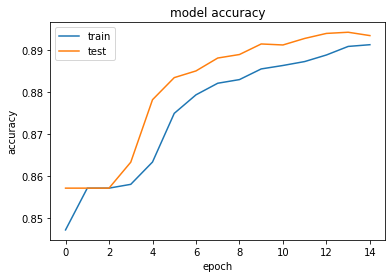

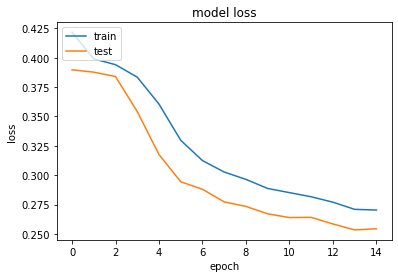

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()